# Feature Detection Tutorial

Feature detection is the process of scanning computer images to extract bits of identifiable pieces of information. There is no exact universal definition on what constitutes a feature but we can define certain type of features such as edges, corners and blobs (ROI).

In [1]:
import os
import cv2
import numpy as np
from matplotlib import pyplot as plt

In [2]:
def printImage(img):
    plt.rcParams["figure.figsize"] = (18,13)
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.show()

<b style="font-size:18px;">Exercise 1.0 - Corner Harris</b>

Using opencv research how to use cv2.cornerHarris() function. 

Download the <a href="https://github.com/dylanseychell/COTSDataset/blob/master/Part%202%20-%20Multiple%20Objects/academic_book_oc/3_colour.jpeg"> colour_3.jpeg</a> from the academic_book_oc found in the COTS dataset. Apply the corner Harris function to extract features from the image. 


Certain algorithms that we covered today’s tutorial might be covered by a license which will not allow you to use to algorithm. As we are using this for research you might need to download opencv-contrib

<i style="color:red">
You need opencv-contrib installed
Uninstall all previous opencv versions

pip install opencv-python==3.4.2.17 <br>
pip install opencv-contrib-python==3.4.2.17
    </i>
    
<a href="https://docs.opencv.org/4.x/dc/d0d/tutorial_py_features_harris.html
">link</a>

#### Corner Harris:

Corner Harris was an early attempt at detecting corners in an image. This was done by trying to detected a sharp change in intensity in all directions at a point in the image. Given a substantial change the algorithm would label that point as a corner. 







In [3]:
def cornerHarris(img):
    grayImg = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    grayImg = np.float32(grayImg)

    dst = cv2.cornerHarris(grayImg,2,3,0.04)
    #result is dilated for marking the corners, not important
    dst = cv2.dilate(dst,None)

    # Threshold for an optimal value, it may vary depending on the image.
    img[dst>0.01*dst.max()]=[0,255,0]
    return img

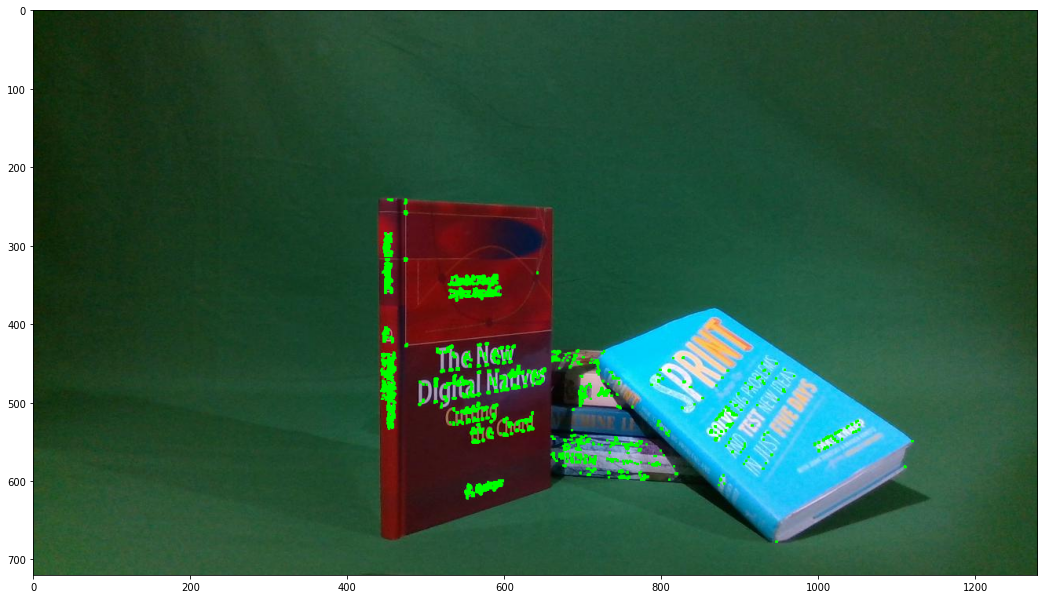

In [5]:
img = cv2.imread("Images/3_colour.jpeg")
img2 = cornerHarris(img)

printImage(img2)

<b style="font-size:18px;">Exercise 1.1 - Shi-Tomasi Corner Detector</b>

Using opencv research how to use cv2.goodFeaturesToTrack() function.  
Download the <a href="https://github.com/dylanseychell/COTSDataset/blob/master/Part%202%20-%20Multiple%20Objects/academic_book_oc/3_colour.jpeg"> colour_3.jpeg</a> from the academic_book_oc found in the COTS dataset. Apply the Shi-Tomasi Corner Detector to extract features from the image. 
<a href="https://docs.opencv.org/3.4/d4/d8c/tutorial_py_shi_tomasi.html
">link</a>

#### Shi-Tomasi Corner Detection:

Shi-Tomasi Corner Detection follows the same priniples of Corner Harris with a one modification. In shi-Tomasi Corner Detection a point is only considered a corner if its x and y values fall onto there respective minimum points. 


In [6]:
def shiTomasi(img):
    gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    corners = cv2.goodFeaturesToTrack(gray,25,0.01,10)
    corners = np.int0(corners)
    for i in corners:
        x,y = i.ravel()
        cv2.circle(img,(x,y),3,255,-1)
    
    return img

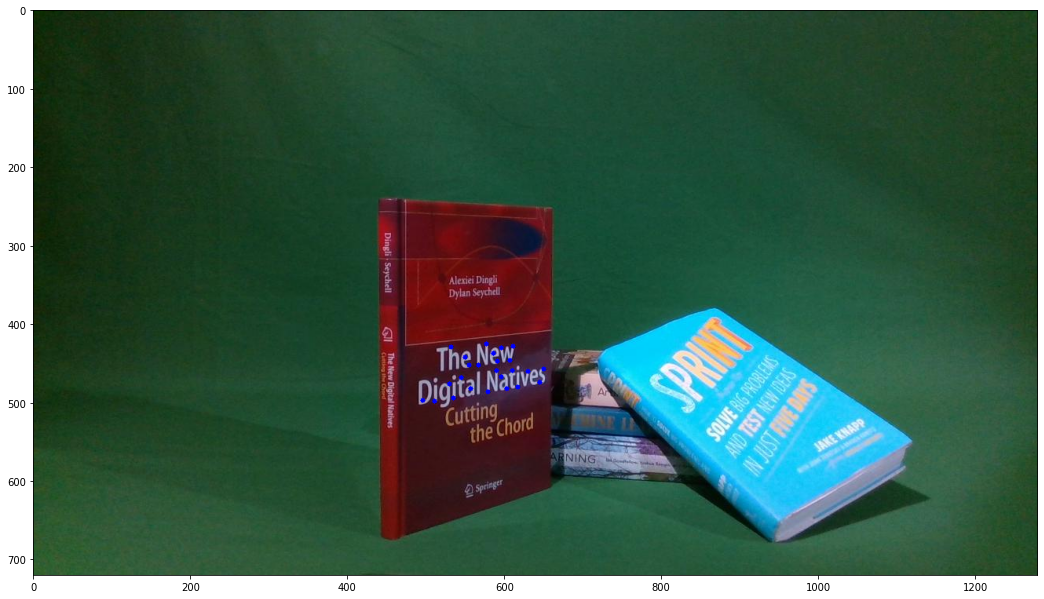

In [7]:
img = cv2.imread('Images/3_colour.jpeg')
img2 = shiTomasi(img)

printImage(img2)

<b style="font-size:18px;">Exercise 1.2 - SIFT</b>

Using opencv research how to use cv2.xfeatures2d.SIFT_create() function.  
Download the <a href="https://github.com/dylanseychell/COTSDataset/blob/master/Part%202%20-%20Multiple%20Objects/academic_book_oc/3_colour.jpeg"> colour_3.jpeg</a> from the academic_book_oc found in the COTS dataset. Apply the SIFT function to extract features from the image. 

<i style="color:red">
You need opencv-contrib installed
Uninstall all previous opencv versions

pip install opencv-python==3.4.2.17 <br>
pip install opencv-contrib-python==3.4.2.17
    </i>
    
<a href="https://docs.opencv.org/4.x/da/df5/tutorial_py_sift_intro.html
">link
</a>

#### SIFT (Scale-Invariant Feature Transform):

SIFT is another conner detection technique. Its advantage over the above two is that it can also find corners in scaled images. Its implementation consists of 4 main steps. These are: scale-space Extrema Detection, Key point Localization, Orientation Assignment, Key point Descriptor. Scale-space Extrema Detection makes use of laplacian of gaussian with for multiple σ values. These values act as a scaling parameter. Depending on this scaling parameter this process can find corners the location of a corner, and the scale at which it is at. Next, Key point Localization aims to refine the found key points into more accurate results. It does this by apply Taylor's series to the points and checking the intensity against a threshold value (specified to be 0.03 in the paper). These filtered key points are then given an orientation. This is done by taken a neighbourhood of points around the key point and calculating the gradient magnitude in that region. This is then used to pot a histogram of 36 bins covering all 360 degrees. The highest point in this histogram is taken as the direction. Finally, key point descriptors are created by taking 16 blocks of 4x4 around a key point. For each block a histogram with 8 bins is created. Therefore, there are 128 bins total for each key point. This is represented as a vector to form key point descriptors. 

In [28]:
def SIFT(img):
    gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    sift = cv2.xfeatures2d.SIFT_create(500)
    kp, des = sift.detectAndCompute(gray,None)

    return kp, des

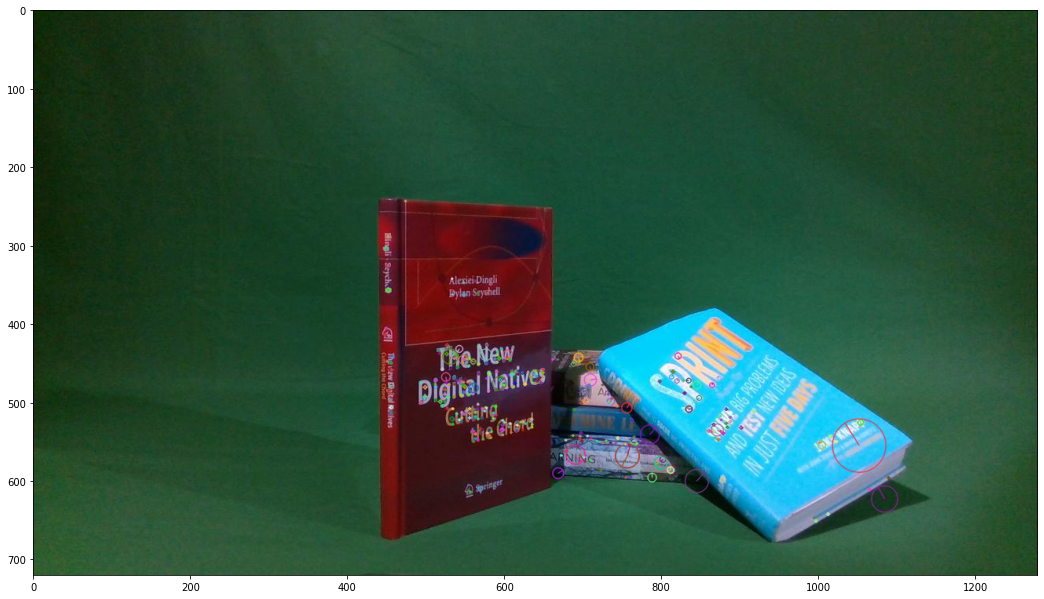

In [29]:
img = cv2.imread('Images/3_colour.jpeg')
kp, des = SIFT(img)

img2 = cv2.drawKeypoints(img,kp,img,flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
printImage(img2)

<b style="font-size:18px;">Exercise 1.3 - SURF</b>

Using opencv research how to use cv2.xfeatures2d.SURF_create() function.  
Download the <a href="https://github.com/dylanseychell/COTSDataset/blob/master/Part%202%20-%20Multiple%20Objects/academic_book_oc/3_colour.jpeg"> colour_3.jpeg</a> from the academic_book_oc found in the COTS dataset. Apply the SURF function to extract features from the image. 

<i style="color:red">
You need opencv-contrib installed
Uninstall all previous opencv versions

pip install opencv-python==3.4.2.17 <br>
pip install opencv-contrib-python==3.4.2.17
    </i>
    
<a href="https://docs.opencv.org/3.4/df/dd2/tutorial_py_surf_intro.html
">link</a>

#### SURF (Speeded-Up Robust Features)

SURF is an algorithm produced to be faster than SIFT. The general structure of the algorithm is the same, but where SIFT uses laplacian of Gaussian with difference of Gaussian, SURF approximates LoG using a box filter. An advantage of this approach is that convolution can be easily calculated with box filters. To orient key points, SURF uses wavelet responses in the horizontal and vertical directions for a neighbourhood of size 6. The sum of all responses with a sliding orientation window of 60 degrees is calculated. The point with the largest sum is taken as the direction. 

In [30]:
def SURF(img):
    gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    surf = cv2.xfeatures2d.SURF_create(500)
    kp, des = surf.detectAndCompute(gray,None)

    return kp, des

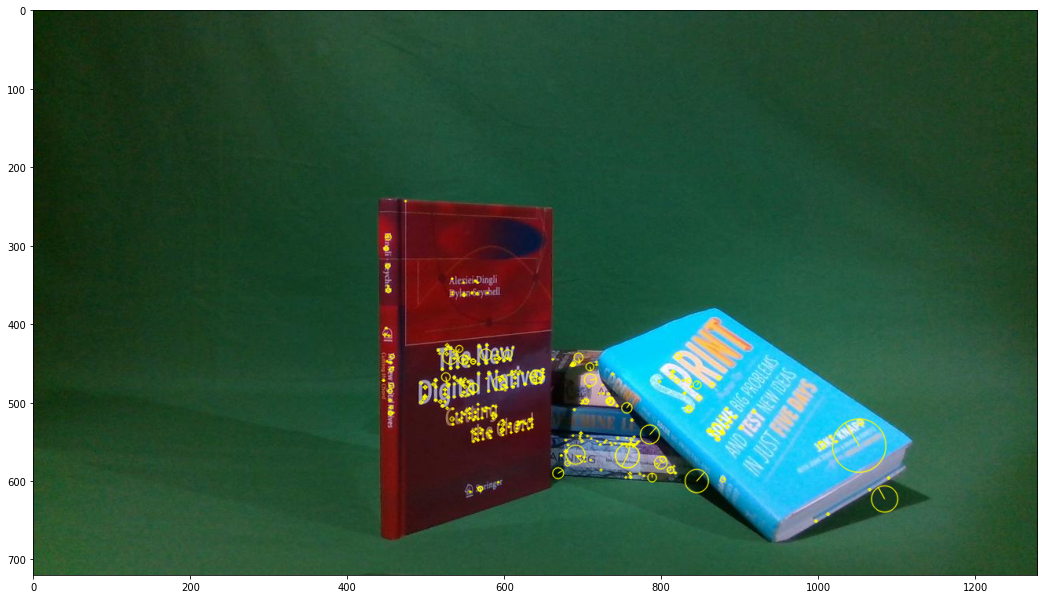

In [35]:
img = cv2.imread('Images/3_colour.jpeg')
SURF(img)

img2 = cv2.drawKeypoints(img,kp,None,(0,255,255),4)
printImage(img2)

<b style="font-size:18px;">Exercise 1.4 - ORB</b>

Using opencv research how to use cv2.ORB_create() function.  
Download the <a href="https://github.com/dylanseychell/COTSDataset/blob/master/Part%202%20-%20Multiple%20Objects/academic_book_oc/3_colour.jpeg"> colour_3.jpeg</a> from the academic_book_oc found in the COTS dataset. Apply ORB function to extract features from the image. 
<i style="color:red">
You need opencv-contrib installed
Uninstall all previous opencv versions

pip install opencv-python==3.4.2.17 <br>
pip install opencv-contrib-python==3.4.2.17
    </i>

<a href="https://docs.opencv.org/3.4/d1/d89/tutorial_py_orb.html
">link</a>

#### ORB (Oriented FAST and Rotated BRIEF):

ORB is a fast alternative to SIFT and SURF. ORB is uses a combination of FAST key point detector and BRIEF descriptor with some modifications to enhance performance. First it uses FAST to find the key points, then applies harris corner to find the top N points. The problem is this does not compute orientation. To fix this it computes the intensity weighted centroid of a patch around the key point. the direction of the vector form the corner point to the centroid gives the orientation. 


In [11]:
# Calculates the ORB function on a given image
def ORB(img):
    orb = cv2.ORB_create()
    kp = orb.detect(img, None)
    kp, des = orb.compute(img, kp)

    return kp, des # returns the descriptors and keypoints in an image 

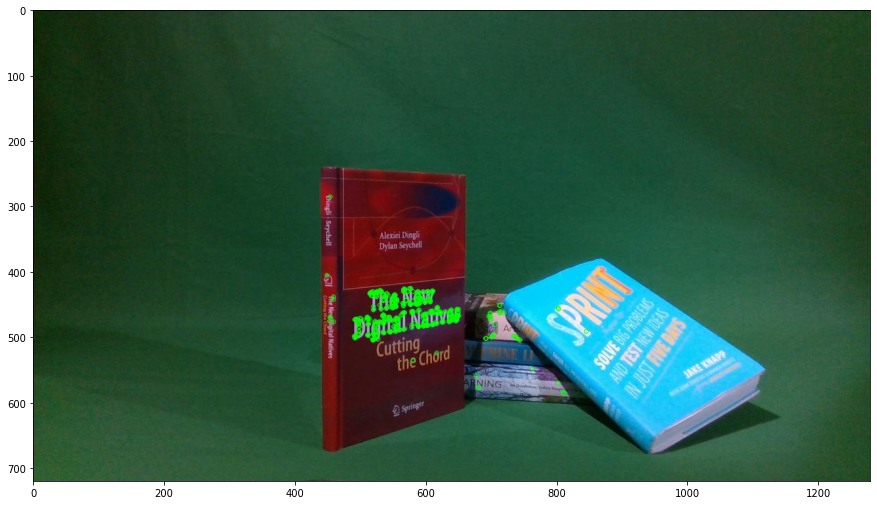

In [12]:
img = cv2.imread('Images/3_colour.jpeg')

kp, des = ORB(img)
img2 = cv2.drawKeypoints(img, kp, None, color=(0, 255, 0), flags=0)

plt.rcParams["figure.figsize"] = (15,10)
plt.imshow(cv2.cvtColor(img2, cv2.COLOR_BGR2RGB))
plt.show()

<b style="font-size:18px;">Exercise 1.5 - Segmentation</b>

At this point we went through a number of different feature detectors and created the feature points that describe interesting and unique features within the image. <br>
In the next exercise research how to use the following matching method cv2.BFMatcher() to find the matching images.
Create a program that given two images it matches the features between the images (<a href="https://github.com/dylanseychell/COTSDataset/blob/master/Part%202%20-%20Multiple%20Objects/academic_book_oc/2_colour.jpeg">use the colour_2.jpeg as well as the image used from the previous exercises from the same repository in the COTS dataset</a>).<br>
Document the difference between the different detectors to show which one gave you the best accuracy. 

<a href="https://docs.opencv.org/4.x/d3/da1/classcv_1_1BFMatcher.html">link></a>


#### Feature Matching

To start, all the diagrams where set to show only the top 10 matches to be able to visualize better. On initial inspection it shows that both SURF and ORB’s top 10 points lie on the red book, while the SIFT algorithm appears to have at least one of its top 10 points on an insignificant point of the stack of books. Furthermore, all the points on the SURF and ORB techniques target important points on the books title, while in the case of SIFT some of the points seem to point to less significant, lower intensity points, like the spine of the book and subtitle. This gives the indication that the SURF and ORB implementations are outperforming the SIFT algorithm. 

When we look at the number of matches across all the algorithms, SIFT comes in at 284 matches, SURF at 355, and ORB at 391 matches. This indicates the ORB method is the best at finding key points in this implementation. 
In addition the ORB method runs the least amount of time according to the run time indicators inbuilt into Jupiter notebooks.




In [48]:
def featureDetectionOBR(feature, image):
    bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)

    kp1, desc1 = ORB(image)
    kp2, desc2 = ORB(feature)

    matchDesc = bf.match(desc1, desc2)
    matchDesc = sorted(matchDesc, key = lambda x:x.distance)
    
    img3 = np.array(image)
    print("ORB Matches: ", len(matchDesc))
    return cv2.drawMatches(image,kp1,feature,kp2,matchDesc[:10], img3, flags=2)

def featureDetectionSIFT(feature, image):
    bf = cv2.BFMatcher()

    kp1, desc1 = SIFT(image)
    kp2, desc2 = SIFT(feature)

    matches = bf.knnMatch(desc1,desc2, k=2)

    good = []
    for m,n in matches:
        if m.distance < 0.75*n.distance:
            good.append([m])

    img3 = np.array(image)
    print("SIFT Matches: ", len(good))
    return cv2.drawMatchesKnn(image,kp1,feature,kp2,good[:10], img3, flags=2)

def featureDetectionSURF(feature, image):
    bf = cv2.BFMatcher()

    kp1, desc1 = SURF(image)
    kp2, desc2 = SURF(feature)

    matches = bf.knnMatch(desc1,desc2, k=2)

    good = []
    for m,n in matches:
        if m.distance < 0.75*n.distance:
            good.append([m])

    img3 = np.array(image)
    print("SURF Matches: ", len(good))
    return cv2.drawMatchesKnn(image,kp1,feature,kp2,good[:10], img3, flags=2)


In [50]:
img1 = cv2.imread('Images/2_colour.jpeg')
img2 = cv2.imread('Images/3_colour.jpeg')

SIFT Matches:  284


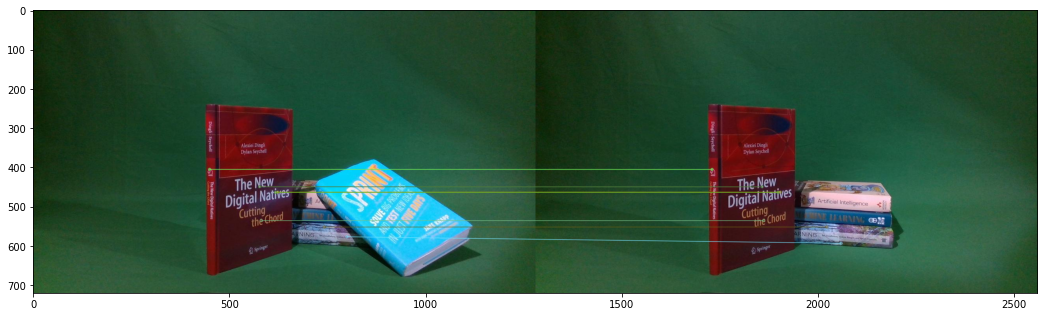

In [51]:
# SIFT Feature Detection
output = featureDetectionSIFT(img1, img2)
printImage(output)

SURF Matches:  355


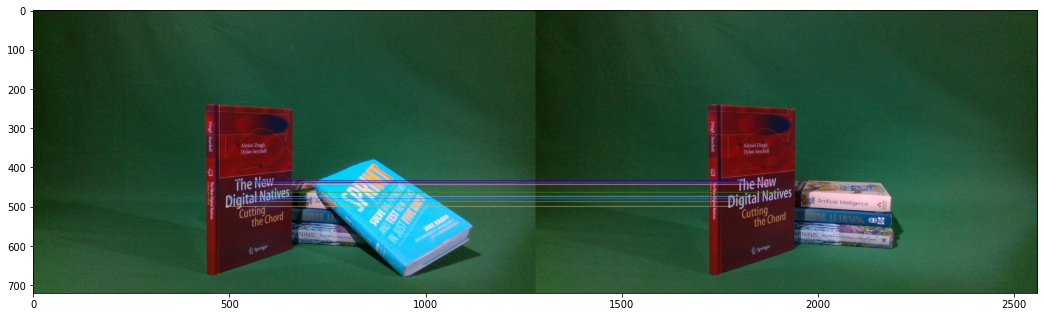

In [52]:
# SURF Feature Detection
output = featureDetectionSURF(img1, img2)
printImage(output)

ORB Matches:  391


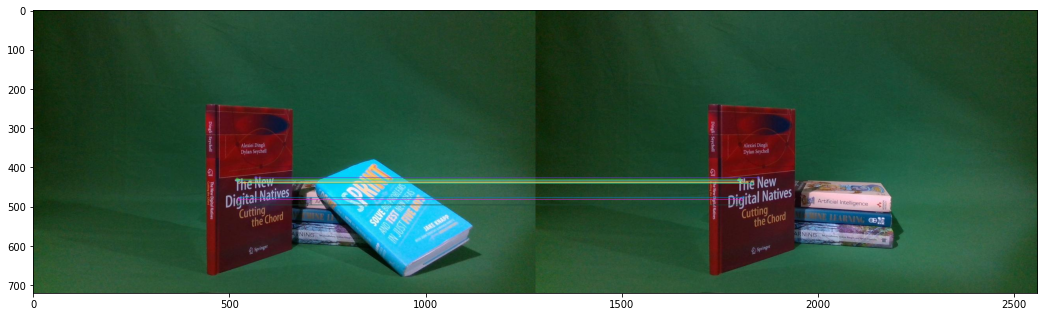

In [53]:
# ORB Feature Detection
output = featureDetectionOBR(img1, img2)
printImage(output)